In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
wine_df= pd.read_csv('data/wine.csv', names= ['Cultivator', 'Alochol', 'Malic_acid','Ash', 'Alcalinity_of_ash',
                                             'Magnesium', 'Total_phenols', 'Flavanoids','Nonflavanoid_phenols',
                                             ' Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines',
                                             'Proline'])

In [12]:
wine_df.head()

Cultivator  Alochol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0           1    14.23        1.71  2.43               15.6        127   
1           1    13.20        1.78  2.14               11.2        100   
2           1    13.16        2.36  2.67               18.6        101   
3           1    14.37        1.95  2.50               16.8        113   
4           1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols   Proanthocyanins  \
0           2.80        3.06                  0.28              2.29   
1           2.65        2.76                  0.26              1.28   
2           2.80        3.24                  0.30              2.81   
3           3.85        3.49                  0.24              2.18   
4           2.80        2.69                  0.39              1.82   

   Color_intensity   Hue  OD280/OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [13]:
wine_df.describe().T

count        mean         std     min       25%  \
Cultivator                    178.0    1.938202    0.775035    1.00    1.0000   
Alochol                       178.0   13.000618    0.811827   11.03   12.3625   
Malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
Ash                           178.0    2.366517    0.274344    1.36    2.2100   
Alcalinity_of_ash             178.0   19.494944    3.339564   10.60   17.2000   
Magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
Total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
 Proanthocyanins              178.0    1.590899    0.572359    0.41    1.2500   
Color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
Hue                           178.0    0.957449    0.228572    0.48    0.7825   
OD280/OD315_of_diluted_wines  178.0    2.611685    0.709990    1.27    1.9375   
Proline                       178.0  746.893258  314.907474  278.00  500.5000   

                                  50%       75%      max  
Cultivator                      2.000    3.0000     3.00  
Alochol                        13.050   13.6775    14.83  
Malic_acid                      1.865    3.0825     5.80  
Ash                             2.360    2.5575     3.23  
Alcalinity_of_ash              19.500   21.5000    30.00  
Magnesium                      98.000  107.0000   162.00  
Total_phenols                   2.355    2.8000     3.88  
Flavanoids                      2.135    2.8750     5.08  
Nonflavanoid_phenols            0.340    0.4375     0.66  
 Proanthocyanins                1.555    1.9500     3.58  
Color_intensity                 4.690    6.2000    13.00  
Hue                             0.965    1.1200     1.71  
OD280/OD315_of_diluted_wines    2.780    3.1700     4.00  
Proline                       673.500  985.0000  1680.00

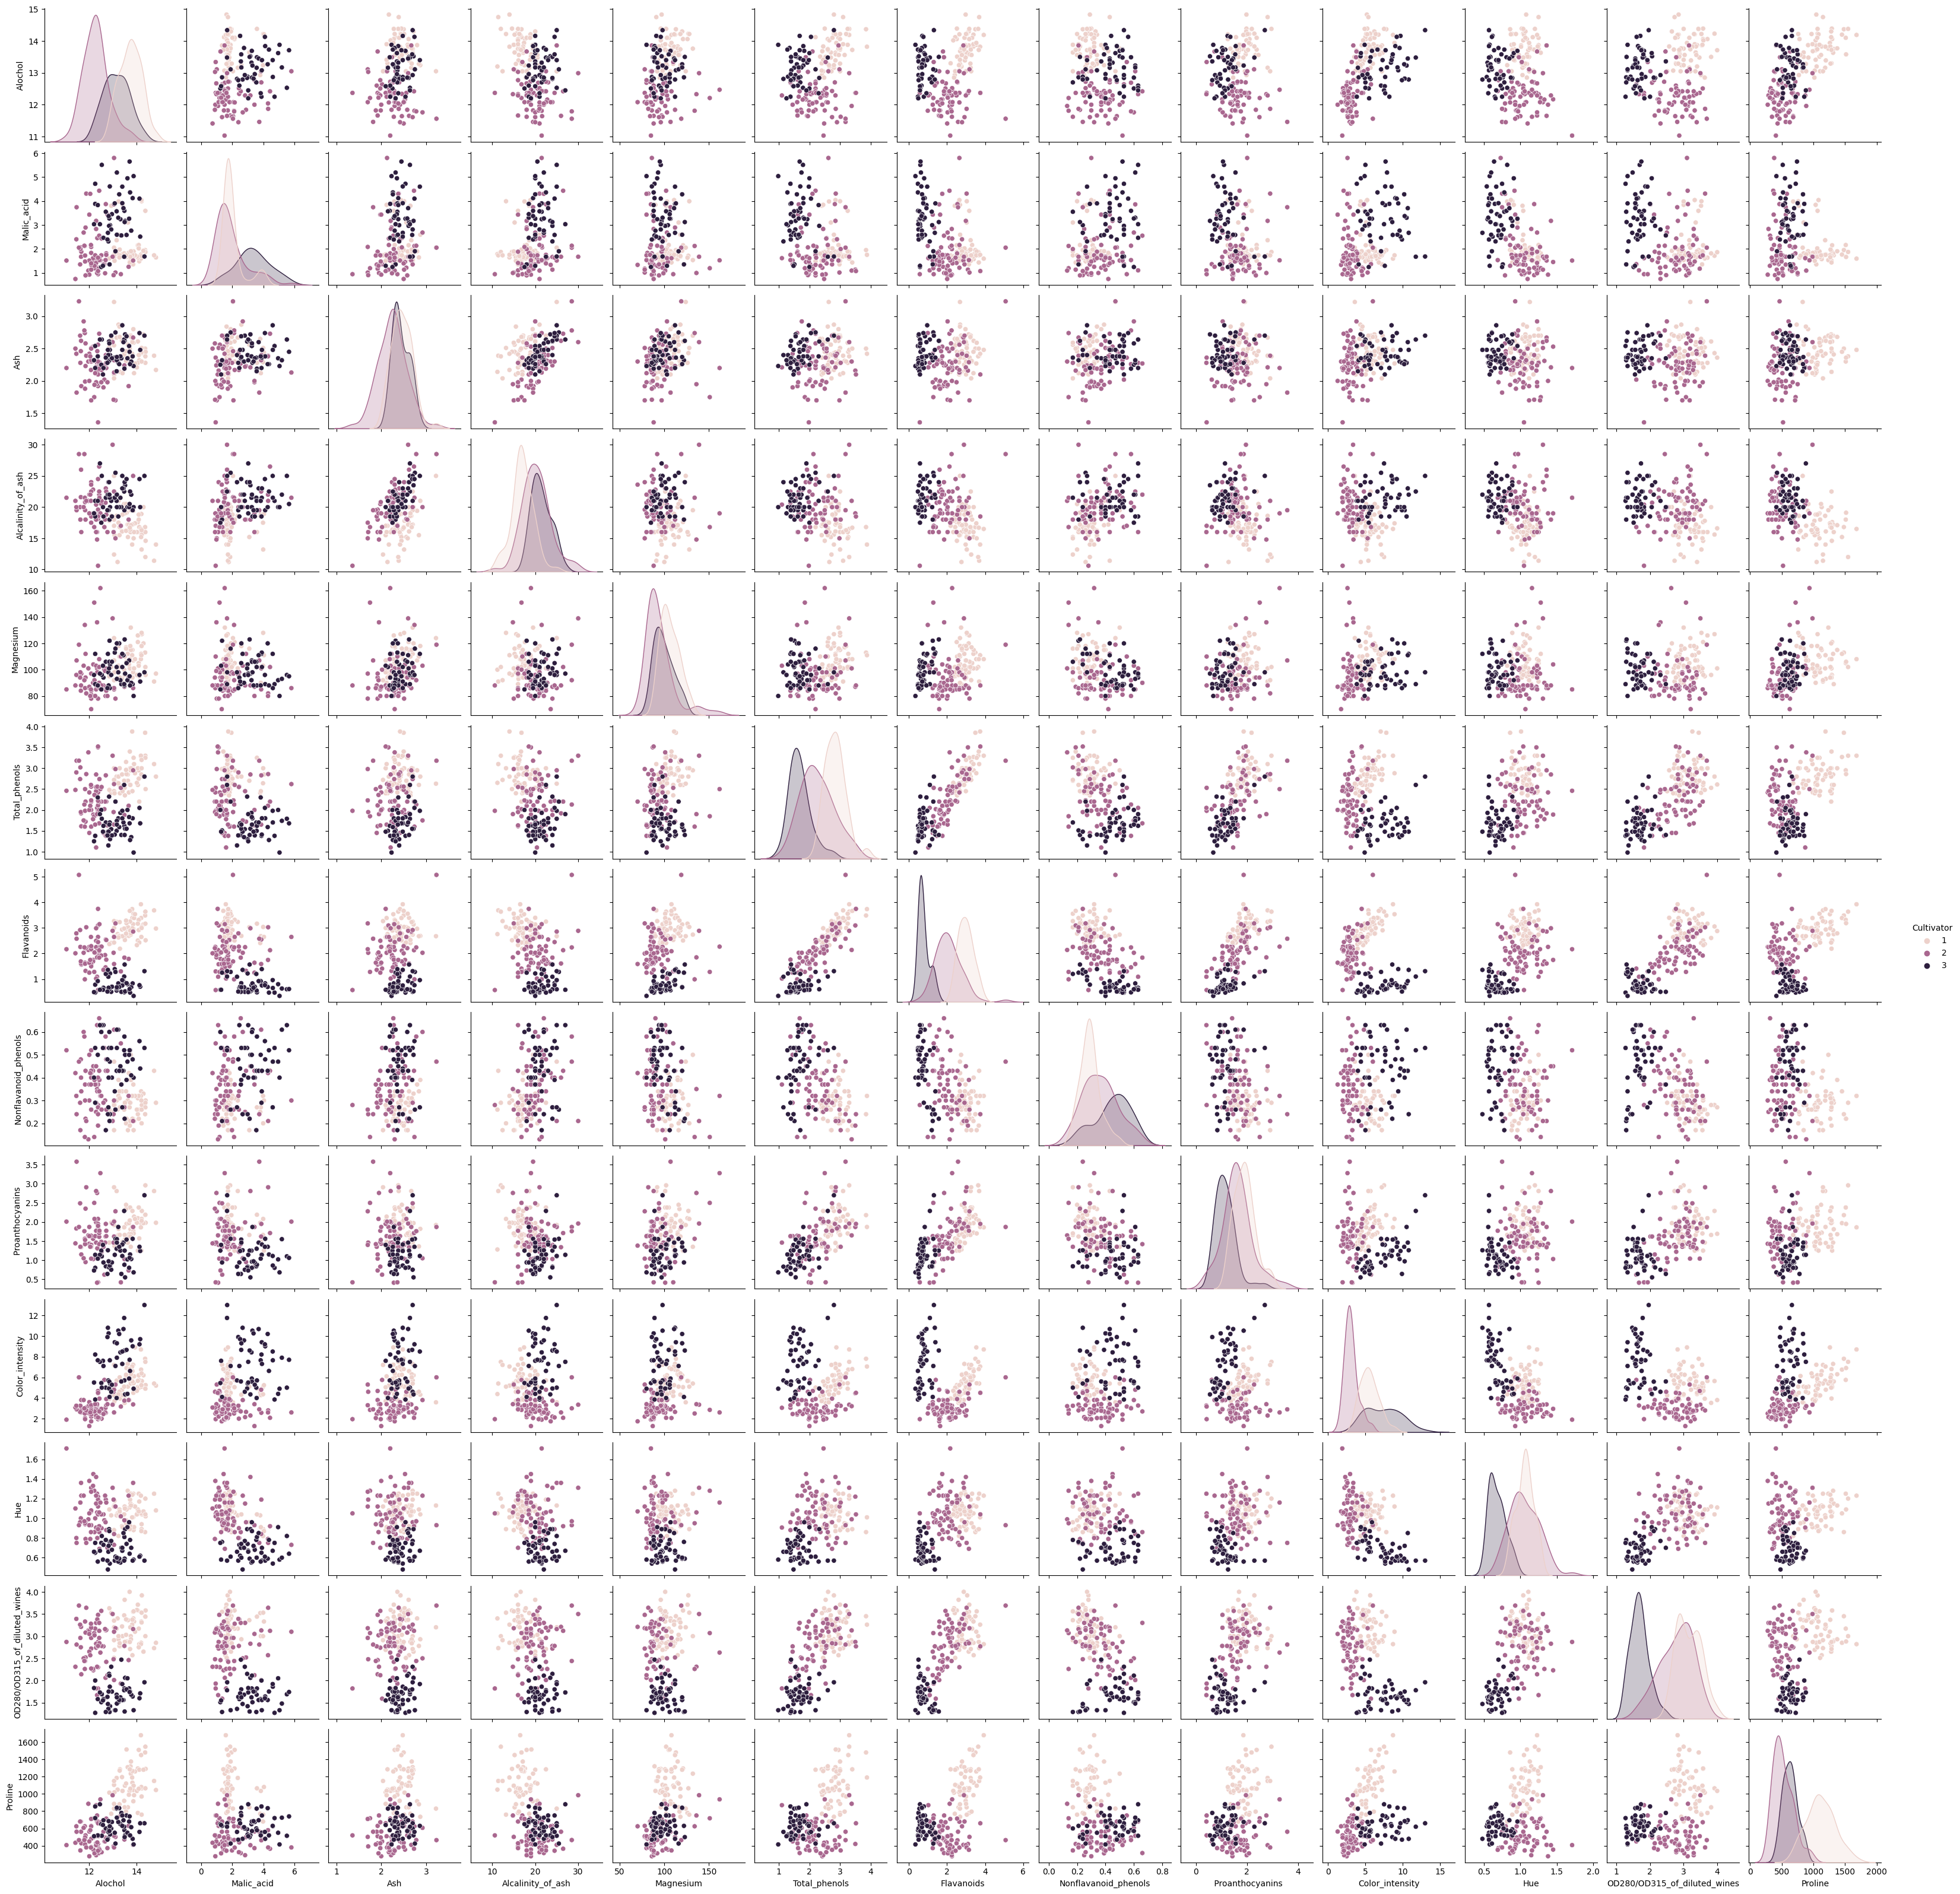

In [15]:
sns.pairplot(wine_df, diag_kind= 'kde', hue= 'Cultivator')

In [17]:
X= wine_df.drop('Cultivator', axis=1)
y= wine_df['Cultivator']

In [18]:
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.25, random_state=9)

In [20]:
model= GaussianNB()

In [21]:
model.fit(X_train,y_train)

GaussianNB()

In [23]:
model.score(X_train, y_train)

0.9849624060150376

In [24]:
y_pred= model.predict(X_test)

In [27]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[20  0  0]
 [ 0 13  0]
 [ 0  0 12]]
